# Welcome to Company Financial Data Preprocessing Project!
### `Dataset Source`
This dataset is downloaded from Kaggle.com, author Atharva Arya [Company Financial Dataset](https://www.kaggle.com/datasets/atharvaarya25/financials)

### `Information and Guideline`
Please refer to our GitHub Main Repository Page [GitHub Repository](https://github.com/Jen-uis/Preprocessing-Financial-Data)  
  
This Project is mainly provided for educational purposes only. Please do not republish it for monetary value without original author's autorization.

### `Author`
This Project is created By Nathaniel Zhu [GitHub @Jen-uis](https://github.com/Jen-uis) on June 15th, 2024.

## Project Guideline
    - TBD

## Main Objectives For this analysis
If you are going educational purposes, do not view the solutions and try to resolve them on your own, then refer to each solution in Section I. Have fun!


- Numbers are formatted incorrectly: e.g. $22,00,000 rather than $2,200,000
- If we are following US Date, Date is formatted incorrectly: 01/06/2014 rather than 06/01/2024. Then sort them in order from Jan to Dec in ascending order.
- Units Sold column numbers are in Currency format, need to reformat them into general numbers. Besides there are 0.5 (half) units sold, we are going to round them up to the closest whole number.
- Remove all dollar sign
- Under Discounts, change "-" into "0" for better mathematical analysis
- Change data type from objects into integer
- (Optional) remove "," (comma) from all numerical numbers (try If Else)
- (Optional) Plot Sales and Profits with respect to Timeline

## Section I: Data Pre-Processing

In [1]:
# Importing Necessary Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading dataset
financial_data = pd.read_csv("Data/Financials.csv")

# View some lines to understand the data
financial_data.head(5)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


In [3]:
# Check for missing values (if any) in each columns
missing_values = financial_data.isna().sum()

print(missing_values)

Segment                  0
Country                  0
 Product                 0
 Discount Band           0
 Units Sold              0
 Manufacturing Price     0
 Sale Price              0
 Gross Sales             0
 Discounts               0
  Sales                  0
 COGS                    0
 Profit                  0
Date                     0
Month Number             0
 Month Name              0
Year                     0
dtype: int64


Looking good, no issues of missing data, now let's work on the Cleaning now!

In [4]:
# There are extra spaces in column name, let's fix that
financial_data.columns = financial_data.columns.str.strip()

In [5]:
# Clean Numerical Columns
def clean_numeric(column):
    return (
        financial_data[column]
        .astype(str)
        .str.replace("$", "", regex = False)
        .str.replace(",", "", regex = False)
        .str.replace("-", "0", regex = False)
        .str.replace(r"[^\d.]", "", regex = True) # remove non-numeric characters
        .astype(float)
    )

# List of numerical columns to clean
num_cols = [
    "Units Sold", "Manufacturing Price", "Sale Price", "Gross Sales", "Discounts", "Sales", "COGS", "Profit"
]

# Apply the function
for col in num_cols:
    financial_data[col] = clean_numeric(col)

# Rounding up to whole number
financial_data["Units Sold"] = np.ceil(financial_data["Units Sold"]).astype(int)

financial_data.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1619,3.0,20.0,32370.0,0.0,32370.0,16185.0,16185.0,01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,1321,3.0,20.0,26420.0,0.0,26420.0,13210.0,13210.0,01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178,3.0,15.0,32670.0,0.0,32670.0,21780.0,10890.0,01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888,3.0,15.0,13320.0,0.0,13320.0,8880.0,4440.0,01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470,3.0,15.0,37050.0,0.0,37050.0,24700.0,12350.0,01/06/2014,6,June,2014


In [6]:
# Fix Date Formatting
financial_data["Date"] = pd.to_datetime(financial_data["Date"], dayfirst=True)

financial_data = financial_data.sort_values(by="Date", ascending=True)
financial_data.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
202,Government,Canada,Velo,Low,2646,120.0,20.0,52920.0,2116.80,50803.20,26460.0,24343.20,2013-09-01,9,September,2013
626,Enterprise,France,Carretera,High,1023,3.0,125.0,127875.0,17902.50,109972.50,122760.0,12787.50,2013-09-01,9,September,2013
336,Midmarket,United States of America,Paseo,Medium,2931,10.0,15.0,43965.0,3077.55,40887.45,29310.0,11577.45,2013-09-01,9,September,2013
179,Government,United States of America,Velo,Low,736,120.0,20.0,14720.0,588.80,14131.20,7360.0,6771.20,2013-09-01,9,September,2013
523,Midmarket,Mexico,Velo,High,655,120.0,15.0,9825.0,1080.75,8744.25,6550.0,2194.25,2013-09-01,9,September,2013


## Data Analysis
Since now we will start to understand the background of this financial data

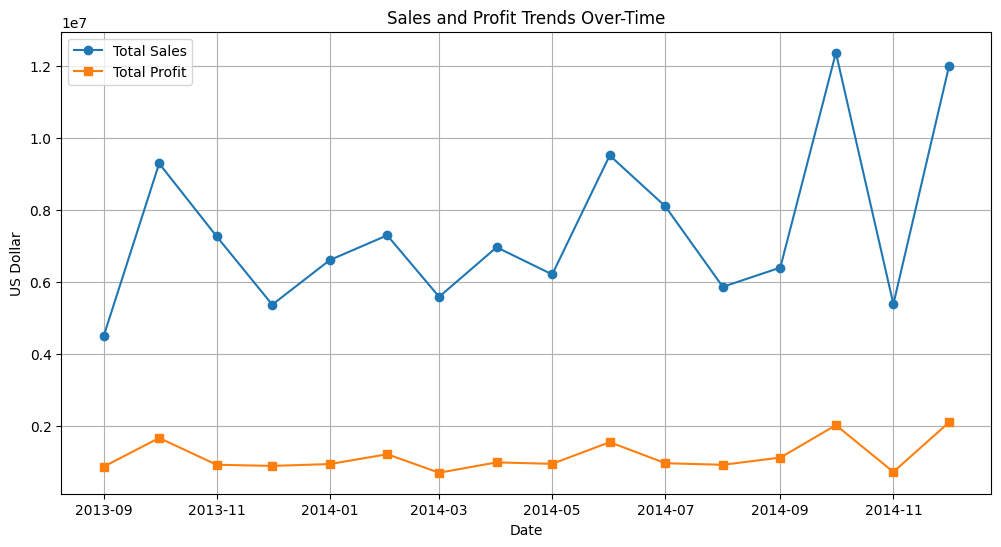

In [19]:
# Sales and Profit Trends over-time

sales_trend = financial_data.groupby("Date")[["Sales", "Profit"]].sum()

plt.figure(figsize=(12, 6))
plt.plot(sales_trend.index, sales_trend["Sales"], label = "Total Sales", marker = "o")
plt.plot(sales_trend.index, sales_trend["Profit"], label = "Total Profit", marker = "s")
plt.xlabel("Date")
plt.ylabel("US Dollar")
plt.title("Sales and Profit Trends Over-Time")
plt.legend()
plt.grid()
plt.show()

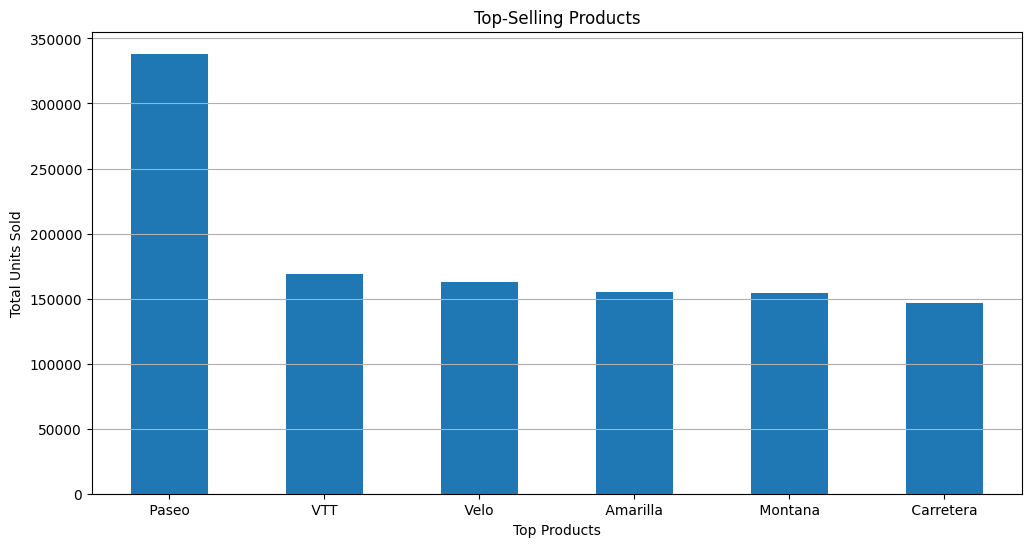

In [18]:
# Top selling product
top_products = financial_data.groupby("Product")["Units Sold"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
top_products.plot(kind = "bar")
plt.xlabel("Top Products")
plt.ylabel("Total Units Sold")
plt.title("Top-Selling Products")
plt.xticks(rotation = 360)
plt.grid(axis="y")
plt.show()